In [1]:
import stac
import pandas as pd
import numpy as np
from scipy import stats
import scikit_posthocs as sp
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join
import joblib

In [2]:
nab_df = pd.read_csv("../nab_scores.csv")
display(nab_df)

,anomaly detection method,dataset,standard nab score
0,anomalous,Twitter_volume_FB_filled.csv,99.99
1,anomalous,elb_request_count_8c0756_filled.csv,99.96
2,anomalous,FARM_filled.csv,98.05
3,anomalous,ambient_temperature_system_failure_filled.csv,99.55
4,anomalous,international-airline-passengers_filled.csv,92.82
...,...,...,...
343,windowed_gaussian,exchange-3_cpc_results_nofill.csv,NaN
344,windowed_gaussian,artificial_cd_3_nofill.csv,NaN
345,windowed_gaussian,elb_request_count_8c0756_nofill.csv,NaN
346,windowed_gaussian,artificial_cd_1_nofill.csv,NaN


In [3]:
# Helper functions for performing the statistical tests
def generate_scores(method, method_args, data, labels):
    pairwise_scores = method(data, **method_args) # Matrix for all pairwise comaprisons
    pairwise_scores.set_axis(labels, axis='columns', inplace=True) # Label the cols
    pairwise_scores.set_axis(labels, axis='rows', inplace=True) # Label the rows, note: same label as pairwise combinations
    return pairwise_scores

def plot(scores):
    # Pretty plot of significance
    heatmap_args = {'linewidths': 0.25, 'linecolor': '0.5', 'square': True,
                    'cbar_ax_bbox': [0.80, 0.35, 0.04, 0.3]}

    sp.sign_plot(scores, **heatmap_args)
    
def specific_plot(scores, method_list, char, alpha=.1):
    heatmap_args = {'linewidths': 0.25, 'linecolor': '0.5', 'square': True,
                    'cbar_ax_bbox': [0.80, 0.35, 0.04, 0.3]}
    sig_array = sp.sign_array(scores, alpha)
    sig_array =sig_array.astype(int)
    sp.sign_plot(sig_array, g=method_list,flat=True,**heatmap_args)
    plt.tight_layout()
#     plt.savefig("nab_nemenyi_plot_" + char + ".eps",format="eps")
    plt.savefig("nab_nemenyi_plot_" + char + ".png", dpi=300)


def get_friedman_test_df(corpus):    
    # get a df where
    # rows are datasets in the seasonality/trend/concept drift corpus
    # columns are the methods 
    # elements are the auc

    dataset_column = []
    anomalous_column = []
    fb_column = []
    glim_column  = []
    hstree_column = []
    htm_column = []
    matrix_profile_column = []
    pbad_column = []
    sarimax_column = []
    stl_column = []
    twitter_column = []
    vae_column = []
    windowed_gaussian_column = []

    mypath = "../dataset_roc_auc_tables/"
    for dataset in corpus:
        dataset_column.append(dataset)
        table = nab_df[nab_df["dataset"]==dataset]
    
        anomalous = table[table["anomaly detection method"]=="anomalous"]["standard nab score"].values
        if anomalous:
            if anomalous[0] != anomalous[0]:
                anomalous_column.append(0)
            else:
                anomalous_column.append(anomalous[0])
        else:
            anomalous_column.append(0)

        fb = table[table["anomaly detection method"]=="fb"]["standard nab score"].values
        if fb:
            if fb[0] != fb[0]:
                fb_column.append(0)
            else:
                fb_column.append(fb[0])
        else:
            fb_column.append(0)

        glim = table[table["anomaly detection method"]=="glim"]["standard nab score"].values
        if glim:
            if glim[0] != glim[0]:
                glim_column.append(0)
            else:
                glim_column.append(glim[0])
        else:
            glim_column.append(0)

        hstree = table[table["anomaly detection method"]=="hstree"]["standard nab score"].values
        if hstree:
            if hstree[0] != hstree[0]:
                hstree_column.append(0)
            else:
                hstree_column.append(hstree[0])
        else:
            hstree_column.append(0)

        htm = table[table["anomaly detection method"]=="htm"]["standard nab score"].values
        if htm:
            if htm[0] != htm[0]:
                htm_column.append(0)
            else:
                htm_column.append(htm[0])
        else:
            htm_column.append(0)

        matrix_profile = table[table["anomaly detection method"]=="matrix_profile"]["standard nab score"].values
        if matrix_profile:
            if matrix_profile[0] != matrix_profile[0]:
                matrix_profile_column.append(0)
            else:
                matrix_profile_column.append(matrix_profile[0])
        else:
            matrix_profile_column.append(0)

        pbad = table[table["anomaly detection method"]=="pbad"]["standard nab score"].values
        if pbad:
            if pbad[0] != pbad[0]:
                pbad_column.append(0)
            else:
                pbad_column.append(pbad[0])
        else:
            pbad_column.append(0)

        sarimax = table[table["anomaly detection method"]=="sarimax"]["standard nab score"].values
        if sarimax:
            if sarimax[0] != sarimax[0]:
                sarimax_column.append(0)
            else:
                sarimax_column.append(sarimax[0])
        else:
            sarimax_column.append(0)

        stl = table[table["anomaly detection method"]=="stl"]["standard nab score"].values
        if stl:
            if stl[0] != stl[0]:
                stl_column.append(0)
            else:
                stl_column.append(stl[0])
        else:
            stl_column.append(0)

        twitter = table[table["anomaly detection method"]=="twitter"]["standard nab score"].values
        if twitter:
            if twitter[0] != twitter[0]:
                twitter_column.append(0)
            else:
                twitter_column.append(twitter[0])
        else:
            twitter_column.append(0)

        vae = table[table["anomaly detection method"]=="vae"]["standard nab score"].values
        if vae:
            if vae[0] != vae[0]:
                vae_column.append(0)
            else:
                vae_column.append(vae[0])
        else:
            vae_column.append(0)

        windowed_gaussian = table[table["anomaly detection method"]=="windowed_gaussian"]["standard nab score"].values
        if windowed_gaussian:
            if windowed_gaussian[0] != windowed_gaussian[0]:
                windowed_gaussian_column.append(0)
            else:
                windowed_gaussian_column.append(windowed_gaussian[0])
        else:
            windowed_gaussian_column.append(0)


    df = pd.DataFrame({"Dataset": dataset_column,
                       "Anomalous": anomalous_column,
                       "Prophet": fb_column,
                       "GLiM": glim_column,
                       "HS Tree": hstree_column,
                       "HTM": htm_column,
                       "Matrix Profile": matrix_profile_column,
                       "PBAD": pbad_column,
                       "SARIMAX": sarimax_column,
                       "STL": stl_column,
                       "Twitter": twitter_column,
                       "VAE": vae_column,
                       "Windowed Gaussian": windowed_gaussian_column})

    # display(df)
    df = df.drop(['Dataset'], axis=1)
    # display(df)

    return df


def get_friedman_test_df_miss(corpus):
    # get a df where
    # rows are datasets in the missing corpus
    # columns are the methods 
    # elements are the auc

    dataset_column = []
    anomalous_column = []
    fb_column = []
    glim_column  = []
    hstree_column = []
    htm_column = []
    matrix_profile_column = []
    sarimax_column = []
    stl_column = []
    vae_column = []

    mypath = "../dataset_roc_auc_tables/"
    for dataset in corpus:
        dataset_column.append(dataset)
        table = nab_df[nab_df["dataset"]==dataset]
    
        anomalous = table[table["anomaly detection method"]=="anomalous"]["standard nab score"].values
        if anomalous:
            if anomalous[0] != anomalous[0]:
                anomalous_column.append(0)
            else:
                anomalous_column.append(anomalous[0])
        else:
            anomalous_column.append(0)

        fb = table[table["anomaly detection method"]=="fb"]["standard nab score"].values
        if fb:
            if fb[0] != fb[0]:
                fb_column.append(0)
            else:
                fb_column.append(fb[0])
        else:
            fb_column.append(0)

        glim = table[table["anomaly detection method"]=="glim"]["standard nab score"].values
        if glim:
            if glim[0] != glim[0]:
                glim_column.append(0)
            else:
                glim_column.append(glim[0])
        else:
            glim_column.append(0)

        hstree = table[table["anomaly detection method"]=="hstree"]["standard nab score"].values
        if hstree:
            if hstree[0] != hstree[0]:
                hstree_column.append(0)
            else:
                hstree_column.append(hstree[0])
        else:
            hstree_column.append(0)

        htm = table[table["anomaly detection method"]=="htm"]["standard nab score"].values
        if htm:
            if htm[0] != htm[0]:
                htm_column.append(0)
            else:
                htm_column.append(htm[0])
        else:
            htm_column.append(0)

        matrix_profile = table[table["anomaly detection method"]=="matrix_profile"]["standard nab score"].values
        if matrix_profile:
            if matrix_profile[0] != matrix_profile[0]:
                matrix_profile_column.append(0)
            else:
                matrix_profile_column.append(matrix_profile[0])
        else:
            matrix_profile_column.append(0)

        sarimax = table[table["anomaly detection method"]=="sarimax"]["standard nab score"].values
        if sarimax:
            if sarimax[0] != sarimax[0]:
                sarimax_column.append(0)
            else:
                sarimax_column.append(sarimax[0])
        else:
            sarimax_column.append(0)

        stl = table[table["anomaly detection method"]=="stl"]["standard nab score"].values
        if stl:
            if stl[0] != stl[0]:
                stl_column.append(0)
            else:
                stl_column.append(stl[0])
        else:
            stl_column.append(0)

        vae = table[table["anomaly detection method"]=="vae"]["standard nab score"].values
        if vae:
            if vae[0] != vae[0]:
                vae_column.append(0)
            else:
                vae_column.append(vae[0])
        else:
            vae_column.append(0)

    df = pd.DataFrame({"Dataset": dataset_column,
                       "Anomalous": anomalous_column,
                       "Prophet": fb_column,
                       "GLiM": glim_column,
                       "HS Tree": hstree_column,
                       "HTM": htm_column,
                       "Matrix Profile": matrix_profile_column,
                       "SARIMAX": sarimax_column,
                       "STL": stl_column,
                       "VAE": vae_column})

    # display(df)
    df = df.drop(['Dataset'], axis=1)
    # display(df)

    return df

In [4]:
# get characteristic corpora

seasonality_path = "../../datasets_seasonality/"
seasonality_corpus = []
for dataset in listdir(seasonality_path):
    seasonality_corpus.append(dataset)
# print(seasonality_corpus)

trend_path = "../../datasets_trend/"
trend_corpus = []
for dataset in listdir(trend_path):
    trend_corpus.append(dataset)
# print(trend_corpus)

conceptdrift_path = "../../datasets_conceptdrift/"
conceptdrift_corpus = []
for dataset in listdir(conceptdrift_path):
    conceptdrift_corpus.append(dataset)
# print(conceptdrift_corpus)

missing_path = "../../datasets_missing/"
missing_corpus = []
for dataset in listdir(missing_path):
    missing_corpus.append(dataset)
# print(missing_corpus)

## Seasonality

In [5]:
df = get_friedman_test_df(seasonality_corpus)
data = np.asarray(df)

alpha = 0.1 # Set this to the desired alpha/signifance level

stat, p = stats.friedmanchisquare(*data)

reject = p <= alpha
print("Should we reject H0 (i.e. is there a difference in the means) at the", (1-alpha)*100, "% confidence level?", reject)

Should we reject H0 (i.e. is there a difference in the means) at the 90.0 % confidence level? True


In [6]:
nemenyi_scores = generate_scores(sp.posthoc_nemenyi_friedman, {}, data, df.columns)

# significance values
nemenyi_scores

,Anomalous,Prophet,GLiM,HS Tree,HTM,Matrix Profile,PBAD,SARIMAX,STL,Twitter,VAE,Windowed Gaussian
Anomalous,1.000000,0.440001,0.900000,0.259619,0.170994,0.374579,0.001000,0.068963,0.057173,0.900000,0.900000,0.892191
Prophet,0.440001,1.000000,0.900000,0.900000,0.900000,0.900000,0.638894,0.900000,0.900000,0.900000,0.900000,0.900000
GLiM,0.900000,0.900000,1.000000,0.900000,0.900000,0.900000,0.183504,0.900000,0.900000,0.900000,0.900000,0.900000
HS Tree,0.259619,0.900000,0.900000,1.000000,0.900000,0.900000,0.814256,0.900000,0.900000,0.900000,0.794768,0.900000
HTM,0.170994,0.900000,0.900000,0.900000,1.000000,0.900000,0.900000,0.900000,0.900000,0.900000,0.677865,0.900000
Matrix Profile,0.374579,0.900000,0.900000,0.900000,0.900000,1.000000,0.697347,0.900000,0.900000,0.900000,0.900000,0.900000
PBAD,0.001000,0.638894,0.183504,0.814256,0.900000,0.697347,1.000000,0.900000,0.900000,0.075528,0.018784,0.197422
SARIMAX,0.068963,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,1.000000,0.900000,0.736317,0.461450,0.900000
STL,0.057173,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,1.000000,0.697347,0.418211,0.900000
Twitter,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.075528,0.736317,0.697347,1.000000,0.900000,0.900000


                   Anomalous  Prophet  GLiM  HS Tree  HTM  Matrix Profile  \
Anomalous               -1.0      0.0   0.0      0.0  0.0             0.0   
Prophet                  0.0     -1.0   0.0      0.0  0.0             0.0   
GLiM                     0.0      0.0  -1.0      0.0  0.0             0.0   
HS Tree                  0.0      0.0   0.0     -1.0  0.0             0.0   
HTM                      0.0      0.0   0.0      0.0 -1.0             0.0   
Matrix Profile           0.0      0.0   0.0      0.0  0.0            -1.0   
PBAD                     2.0      0.0   0.0      0.0  0.0             0.0   
SARIMAX                  0.0      0.0   0.0      0.0  0.0             0.0   
STL                      0.0      0.0   0.0      0.0  0.0             0.0   
Twitter                  0.0      0.0   0.0      0.0  0.0             0.0   
VAE                      0.0      0.0   0.0      0.0  0.0             0.0   
Windowed Gaussian        0.0      0.0   0.0      0.0  0.0             0.0   

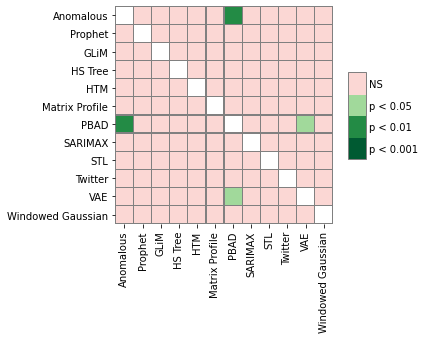

In [7]:
plot(nemenyi_scores)

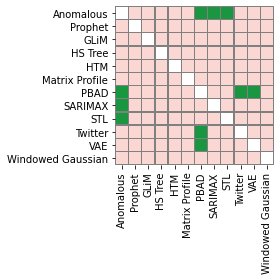

In [8]:
# specify a p value
specific_plot(nemenyi_scores,list(nemenyi_scores.columns.values),"seasonality",.1)

In [9]:
# specify a p value
# specific_plot(nemenyi_scores,list(nemenyi_scores.columns.values),.5)

## Trend

In [10]:
df = get_friedman_test_df(trend_corpus)
data = np.asarray(df)

alpha = 0.1 # Set this to the desired alpha/signifance level

stat, p = stats.friedmanchisquare(*data)

reject = p <= alpha
print("Should we reject H0 (i.e. is there a difference in the means) at the", (1-alpha)*100, "% confidence level?", reject)

Should we reject H0 (i.e. is there a difference in the means) at the 90.0 % confidence level? True


                   Anomalous  Prophet  GLiM  HS Tree  HTM  Matrix Profile  \
Anomalous               -1.0      0.0   0.0      0.0  2.0             0.0   
Prophet                  0.0     -1.0   0.0      0.0  0.0             0.0   
GLiM                     0.0      0.0  -1.0      0.0  0.0             0.0   
HS Tree                  0.0      0.0   0.0     -1.0  0.0             0.0   
HTM                      2.0      0.0   0.0      0.0 -1.0             0.0   
Matrix Profile           0.0      0.0   0.0      0.0  0.0            -1.0   
PBAD                     2.0      0.0   3.0      0.0  0.0             0.0   
SARIMAX                  0.0      0.0   0.0      0.0  0.0             0.0   
STL                      3.0      0.0   0.0      0.0  0.0             0.0   
Twitter                  0.0      0.0   0.0      0.0  0.0             0.0   
VAE                      0.0      0.0   0.0      0.0  0.0             0.0   
Windowed Gaussian        0.0      0.0   0.0      0.0  0.0             0.0   

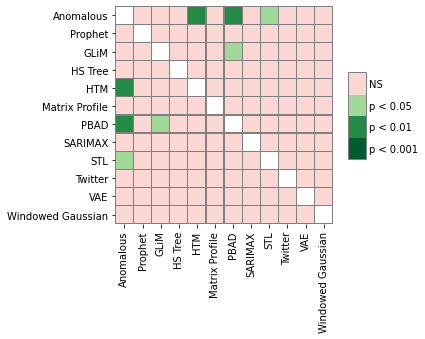

In [11]:
nemenyi_scores = generate_scores(sp.posthoc_nemenyi_friedman, {}, data, df.columns)
plot(nemenyi_scores)

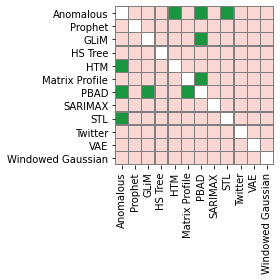

In [12]:
# specify a p value
specific_plot(nemenyi_scores,list(nemenyi_scores.columns.values),"trend",.1)

In [13]:
# specific_plot(nemenyi_scores,list(nemenyi_scores.columns.values),.5)

## Concept Drift

In [14]:
df = get_friedman_test_df(conceptdrift_corpus)
data = np.asarray(df)

alpha = 0.1 # Set this to the desired alpha/signifance level

stat, p = stats.friedmanchisquare(*data)

reject = p <= alpha
print("Should we reject H0 (i.e. is there a difference in the means) at the", (1-alpha)*100, "% confidence level?", reject)

Should we reject H0 (i.e. is there a difference in the means) at the 90.0 % confidence level? True


                   Anomalous  Prophet  GLiM  HS Tree  HTM  Matrix Profile  \
Anomalous               -1.0      0.0   0.0      0.0  0.0             2.0   
Prophet                  0.0     -1.0   0.0      0.0  0.0             2.0   
GLiM                     0.0      0.0  -1.0      0.0  0.0             0.0   
HS Tree                  0.0      0.0   0.0     -1.0  0.0             0.0   
HTM                      0.0      0.0   0.0      0.0 -1.0             0.0   
Matrix Profile           2.0      2.0   0.0      0.0  0.0            -1.0   
PBAD                     2.0      2.0   0.0      0.0  0.0             0.0   
SARIMAX                  0.0      0.0   0.0      0.0  0.0             0.0   
STL                      2.0      2.0   3.0      0.0  0.0             0.0   
Twitter                  0.0      0.0   0.0      0.0  0.0             0.0   
VAE                      0.0      0.0   0.0      0.0  0.0             0.0   
Windowed Gaussian        0.0      0.0   0.0      0.0  0.0             0.0   

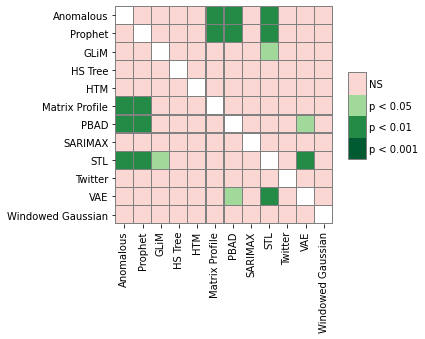

In [15]:
nemenyi_scores = generate_scores(sp.posthoc_nemenyi_friedman, {}, data, df.columns)
plot(nemenyi_scores)

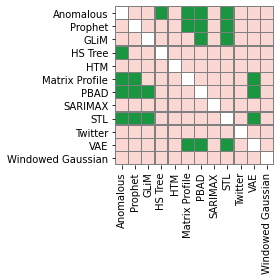

In [16]:
# specify a p value
specific_plot(nemenyi_scores,list(nemenyi_scores.columns.values),"conceptdrift",.1)

In [17]:
# specific_plot(nemenyi_scores,list(nemenyi_scores.columns.values),.5)

## Missing

In [18]:
missing_corpus

['ec2_cpu_utilization_ac20cd_nofill.csv',
 'ibm-common-stock-closing-prices_nofill.csv',
 'exchange-2_cpc_results_nofill.csv',
 'exchange-2_cpm_results_nofill.csv',
 'exchange-3_cpm_results_nofill.csv',
 'exchange-3_cpc_results_nofill.csv',
 'artificial_cd_3_nofill.csv',
 'elb_request_count_8c0756_nofill.csv',
 'artificial_cd_1_nofill.csv',
 'ambient_temperature_system_failure_nofill.csv']

In [19]:
df = get_friedman_test_df_miss(missing_corpus)
data = np.asarray(df)

alpha = 0.1 # Set this to the desired alpha/signifance level

stat, p = stats.friedmanchisquare(*data)

reject = p <= alpha
print("Should we reject H0 (i.e. is there a difference in the means) at the", (1-alpha)*100, "% confidence level?", reject)

Should we reject H0 (i.e. is there a difference in the means) at the 90.0 % confidence level? True


                Anomalous  Prophet  GLiM  HS Tree  HTM  Matrix Profile  \
Anomalous            -1.0      0.0   0.0      0.0  3.0             3.0   
Prophet               0.0     -1.0   0.0      0.0  0.0             0.0   
GLiM                  0.0      0.0  -1.0      0.0  0.0             0.0   
HS Tree               0.0      0.0   0.0     -1.0  0.0             0.0   
HTM                   3.0      0.0   0.0      0.0 -1.0             0.0   
Matrix Profile        3.0      0.0   0.0      0.0  0.0            -1.0   
SARIMAX               0.0      0.0   0.0      0.0  0.0             0.0   
STL                   2.0      2.0   3.0      0.0  0.0             0.0   
VAE                   0.0      0.0   0.0      0.0  0.0             0.0   

                SARIMAX  STL  VAE  
Anomalous           0.0  2.0  0.0  
Prophet             0.0  2.0  0.0  
GLiM                0.0  3.0  0.0  
HS Tree             0.0  0.0  0.0  
HTM                 0.0  0.0  0.0  
Matrix Profile      0.0  0.0  0.0  
SARIMAX

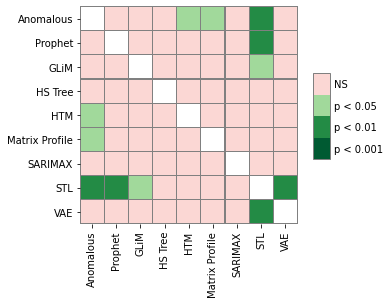

In [20]:
nemenyi_scores = generate_scores(sp.posthoc_nemenyi_friedman, {}, data, df.columns)
plot(nemenyi_scores)

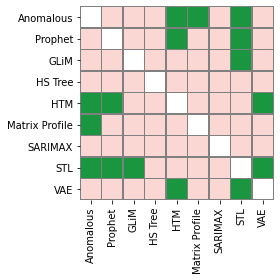

In [21]:
# specify a p value
specific_plot(nemenyi_scores,list(nemenyi_scores.columns.values),"missing",.1)

In [22]:
# specific_plot(nemenyi_scores,list(nemenyi_scores.columns.values),.5)